In [ ]:
import numpy as np
from scipy.stats import bootstrap
! pip install matplotlib


/home/ubuntu/.bashrc: line 1: /etc/profile.d/dlami.sh: No such file or directory
/home/ubuntu/.bashrc: line 1: /etc/profile.d/dlami.sh: No such file or directory
/home/ubuntu/.bashrc: line 1: /etc/profile.d/dlami.sh: No such file or directory
ERROR: Could not find a version that satisfies the requirement xelatex (from versions: none)
ERROR: No matching distribution found for xelatex


In [33]:
shared_amp = 0.2   # shared across subjects
noise_amp = 0.8
nvox = 50
nsubj = 20
nbootstrap = 1000

In [34]:
shared = np.random.randn(nvox) * shared_amp
noise = np.random.randn(nsubj, nvox) * noise_amp
sig = shared + noise


In [35]:
allcorr = []
for ind in range(nbootstrap):
    subj = np.random.randint(0, nsubj, nsubj)
    mean_sig = np.mean(sig[subj, :], axis=0)
    allcorr.append(np.corrcoef(mean_sig, shared)[0, 1])

print(allcorr)

[0.6869313791841148, 0.6711262350043073, 0.6095026957540955, 0.5784437873623748, 0.7109306685685999, 0.7050904390665953, 0.6184382456781051, 0.7384814759091682, 0.6697776368032583, 0.71236733236503, 0.6351748578748254, 0.6720736319712487, 0.6755599139849412, 0.664821838099427, 0.5389952577216797, 0.7253986175973247, 0.6548187659641491, 0.6679720387591419, 0.7287462841848824, 0.5505832956382606, 0.592827753945387, 0.6149313807053236, 0.641809709067177, 0.6760077578717242, 0.6466557526053074, 0.7196424478114491, 0.6739254162465447, 0.6876139749807398, 0.668930070289004, 0.6484246243254638, 0.7065537068019979, 0.7400696844175009, 0.7510024788256675, 0.7054102246801854, 0.649006828738833, 0.6495824295973479, 0.5573715543067018, 0.6851693691044973, 0.7696859747165298, 0.7623176936697369, 0.5768342586638265, 0.6186625213509097, 0.7705042348828762, 0.6417213920357413, 0.7559800140767798, 0.76540974201346, 0.6347102657806517, 0.6480438729738319, 0.6547190046873755, 0.7864385794199279, 0.744338

mean of bootstraps 0.6690759211345196
observed 0.7707092986116487


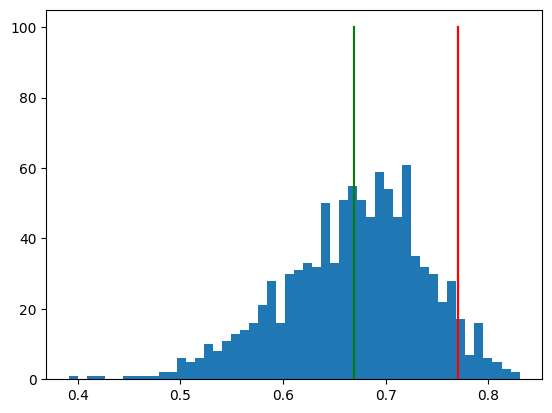

In [36]:
from matplotlib import pyplot as plt
observed = np.corrcoef(np.mean(sig,axis =0), shared)[1,0]
plt.hist(allcorr, bins=50)
plt.plot([observed,observed],[0,100],'r')
bootmean = np.mean(allcorr)
print(f'mean of bootstraps {bootmean}')
print(f'observed {observed}')
plt.plot([observed,observed],[0,100],'r')
plt.plot([bootmean,bootmean],[0,100],'g')

